# Part 1 — PCA from Scratch (NumPy only)
Implements eigen-decomposition, explained variance ratio, inverse transform, and reconstruction error.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
os.chdir("..")
sys.path.append(os.getcwd())

from src.utils.random import set_seed
from src.utils.preprocessing import StandardScaler


In [3]:
import os
os.chdir('..')
import sys
sys.path.append('.')
from src.dimred.pca import PCA


In [4]:
# Data loading (Breast Cancer Wisconsin Diagnostic)
# We avoid sklearn for loading; we use pandas to read the UCI dataset.
# If you're offline, download the CSV once and set LOCAL_CSV path.

UCI_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
LOCAL_CSV = None  # e.g. "data/wdbc.data"

cols = ["id", "diagnosis"] + [f"f{i}" for i in range(30)]
if LOCAL_CSV is None:
    df = pd.read_csv(UCI_URL, header=None, names=cols)
else:
    df = pd.read_csv(LOCAL_CSV, header=None, names=cols)

y = (df["diagnosis"].values == "M").astype(int)  # Malignant=1, Benign=0 (used ONLY for evaluation)
X = df.drop(columns=["id","diagnosis"]).values.astype(float)

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

print("X:", X.shape, "Xs:", Xs.shape, "Malignant%:", y.mean())


X: (569, 30) Xs: (569, 30) Malignant%: 0.37258347978910367


In [5]:
pca = PCA(n_components=2).fit(Xs)
Z2 = pca.transform(Xs)
print("Explained variance ratio (2 comps):", pca.explained_variance_ratio_, "sum:", pca.explained_variance_ratio_.sum())
print("Reconstruction MSE (2 comps):", pca.reconstruction_error(Xs))


Explained variance ratio (2 comps): [0.44272026 0.18971182] sum: 0.6324320765155944
Reconstruction MSE (2 comps): 0.3675679234844056


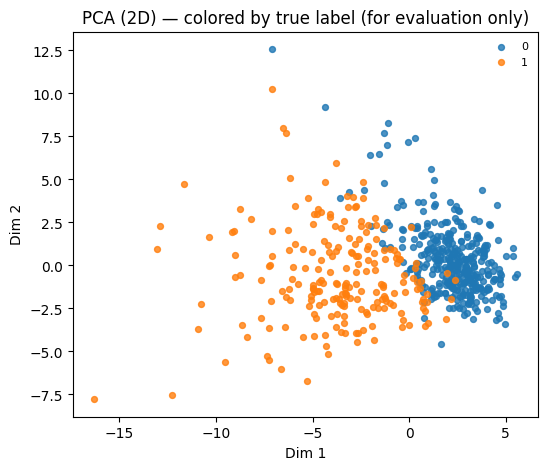

In [6]:
from src.visualization.plots import scatter_2d
scatter_2d(Z2, y, title="PCA (2D) — colored by true label (for evaluation only)")
plt.show()
